In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style="whitegrid")
df = pd.read_csv("Updated_Car_Sales_Data.csv")
df.head()


,Car Make,Car Model,Year,Mileage,Price,Fuel Type,Color,Transmission,Options/Features,Condition,Accident
0,Hyundai,Tucson,2010,52554,44143.820,Hybrid,Black,Automatic,Heated Seats,Used,No
1,Land Rover,Range Rover,2016,115056,25414.060,Diesel,Silver,Manual,GPS,Used,No
2,Honda,Accord,2022,18044,28262.872,Electric,Yellow,Manual,"Bluetooth, Leather Seats, Backup Camera, GPS",Like New,Yes
3,Kia,Soul,2011,79251,28415.848,Hybrid,Orange,Manual,"Backup Camera, GPS, Heated Seats, Leather Seats",New,Yes
4,Volkswagen,Golf,2022,40975,31509.792,Electric,Silver,Automatic,"Leather Seats, Remote Start, Sunroof, Heated S...",New,Yes


In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23000 entries, 0 to 22999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car Make          23000 non-null  object 
 1   Car Model         23000 non-null  object 
 2   Year              23000 non-null  int64  
 3   Mileage           23000 non-null  int64  
 4   Price             23000 non-null  float64
 5   Fuel Type         23000 non-null  object 
 6   Color             23000 non-null  object 
 7   Transmission      23000 non-null  object 
 8   Options/Features  23000 non-null  object 
 9   Condition         23000 non-null  object 
 10  Accident          23000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.9+ MB


,Year,Mileage,Price
count,23000.000000,23000.000000,23000.000000
mean,2016.405826,71329.942696,46038.145075
std,3.756306,42973.351374,64252.736726
min,2010.000000,5015.000000,4000.832000
25%,2013.000000,33252.500000,14740.131000
50%,2017.000000,67282.500000,25489.812000
75%,2020.000000,108982.500000,36176.485000
max,2023.000000,149987.000000,299922.000000


# 1.1 Line Chart — Sales vs Year

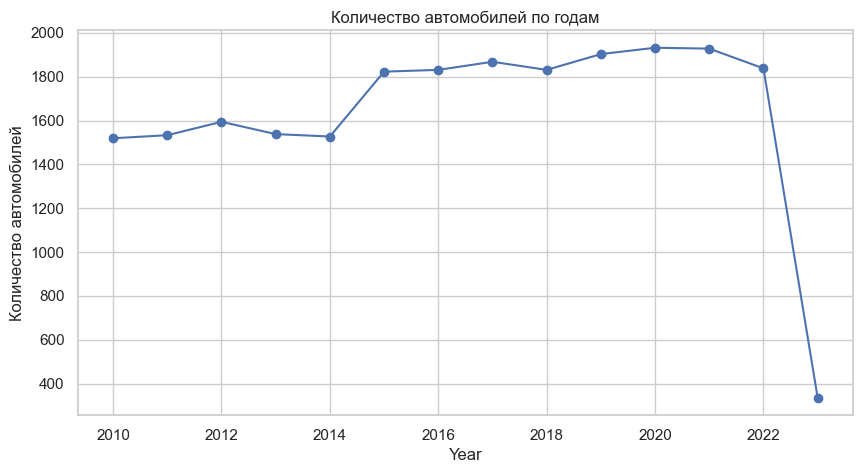

In [16]:
year_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_count.index, year_count.values, marker='o')
plt.title("Количество автомобилей по годам")
plt.xlabel("Year")
plt.ylabel("Количество автомобилей")
plt.grid(True)
plt.show()

# 1.2 Line chart — Advertising vs Sales (Non-recession)

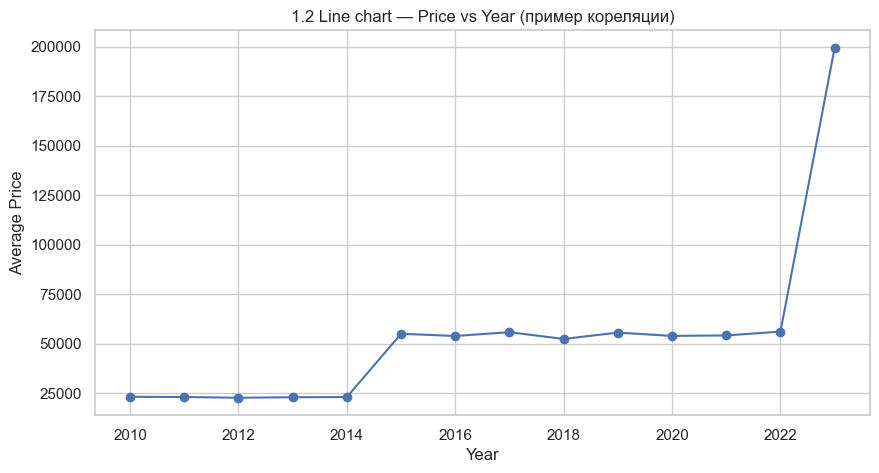

In [17]:
avg_price_year = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_price_year.index, avg_price_year.values, marker='o')
plt.title("1.2 Line chart — Price vs Year (пример кореляции)")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()


# 1.3 Bar chart — Vehicle Type sales comparison

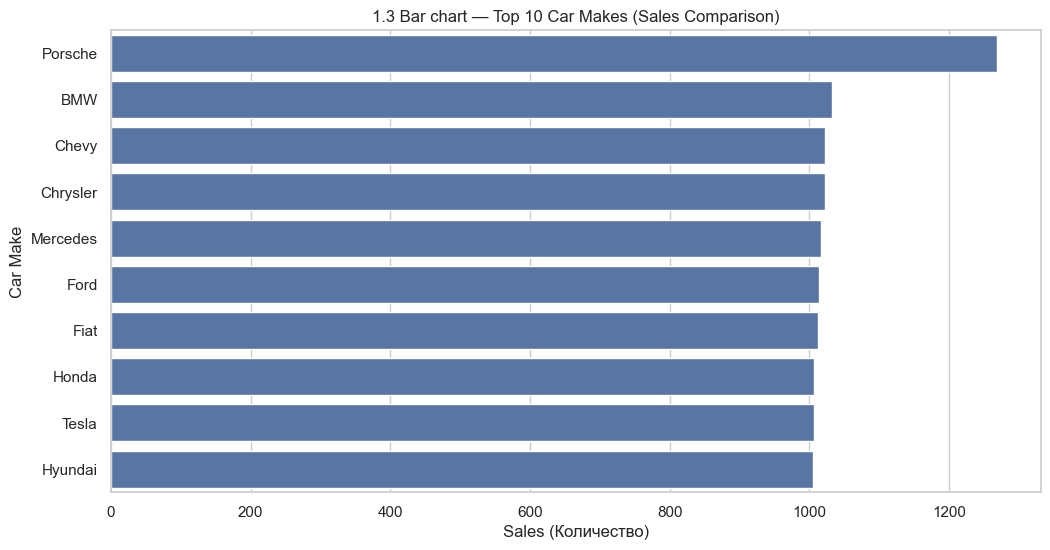

In [18]:
top_make = df['Car Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_make.values, y=top_make.index)
plt.title("1.3 Bar chart — Top 10 Car Makes (Sales Comparison)")
plt.xlabel("Sales (Количество)")
plt.ylabel("Car Make")
plt.show()


# 1.4 Subplots — GDP variations

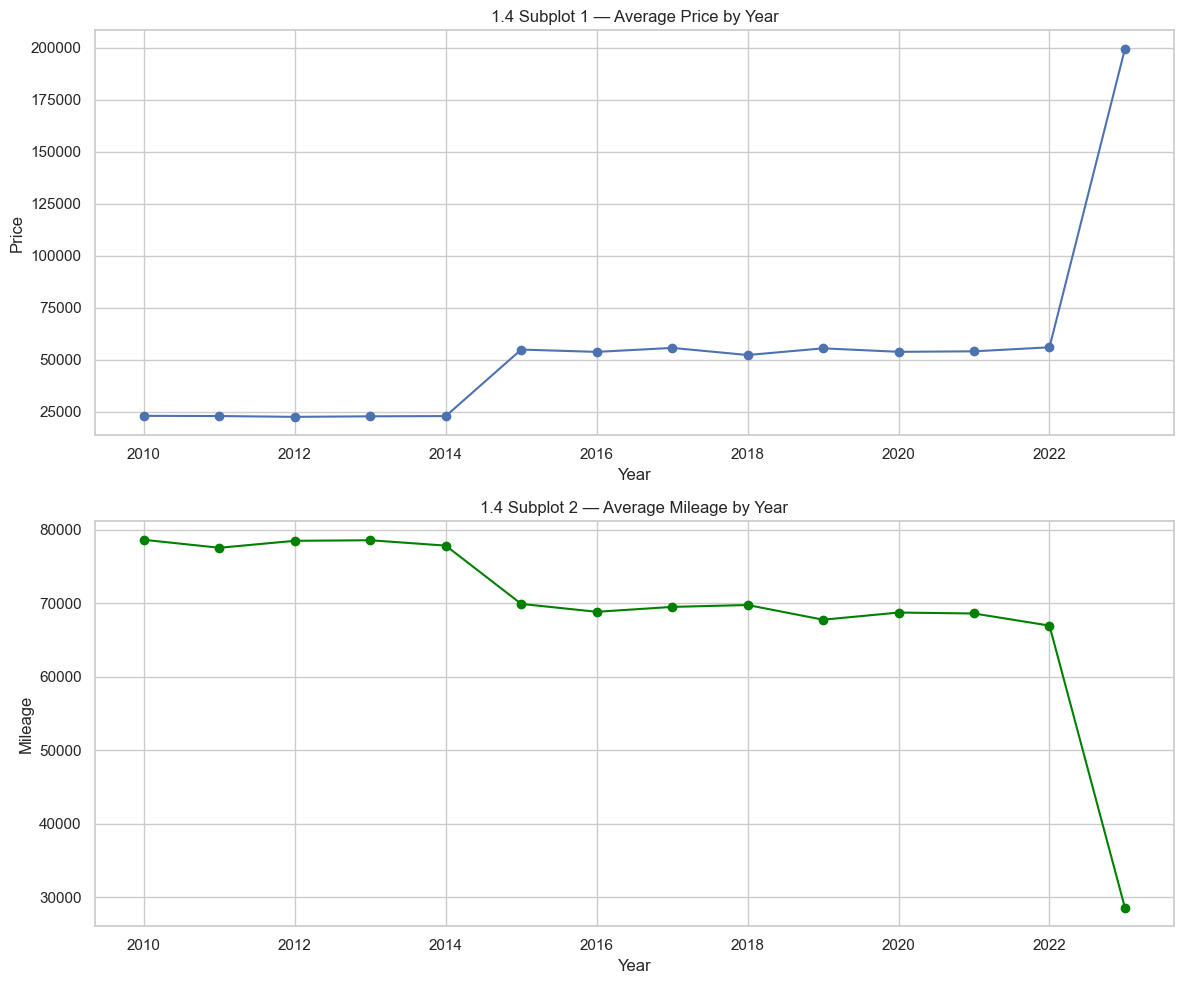

In [20]:
avg_mileage_year = df.groupby('Year')['Mileage'].mean()

fig, ax = plt.subplots(2,1, figsize=(12,10))

ax[0].plot(avg_price_year.index, avg_price_year.values, marker='o')
ax[0].set_title("1.4 Subplot 1 — Average Price by Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")

ax[1].plot(avg_mileage_year.index, avg_mileage_year.values, marker='o', color='green')
ax[1].set_title("1.4 Subplot 2 — Average Mileage by Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Mileage")

plt.tight_layout()
plt.show()


# 1.5 Bubble plot — Seasonality impact

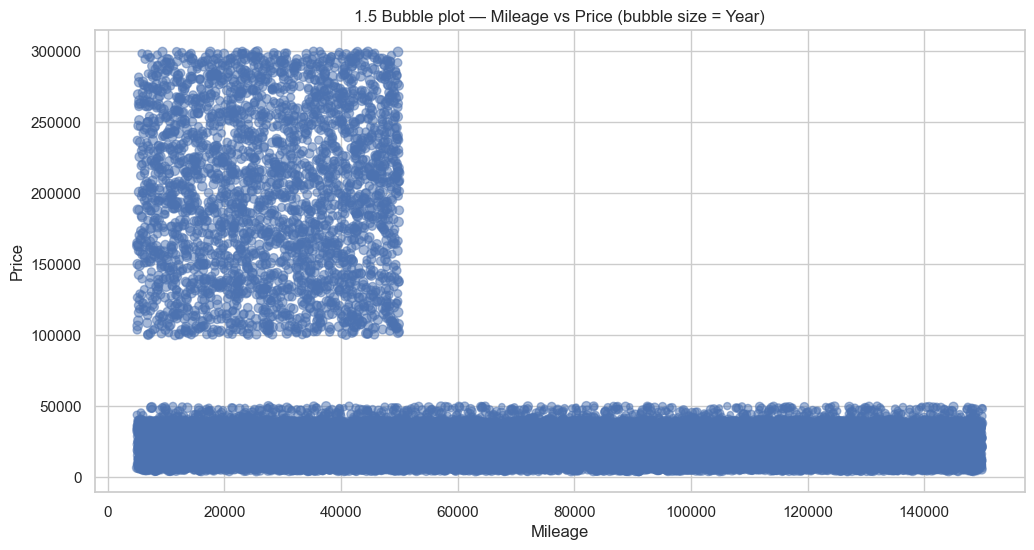

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(df['Mileage'], df['Price'], s=(df['Year']-2000)*2, alpha=0.5)
plt.title("1.5 Bubble plot — Mileage vs Price (bubble size = Year)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


# 1.6 Scatter plot — Avg price vs sales (Recession)

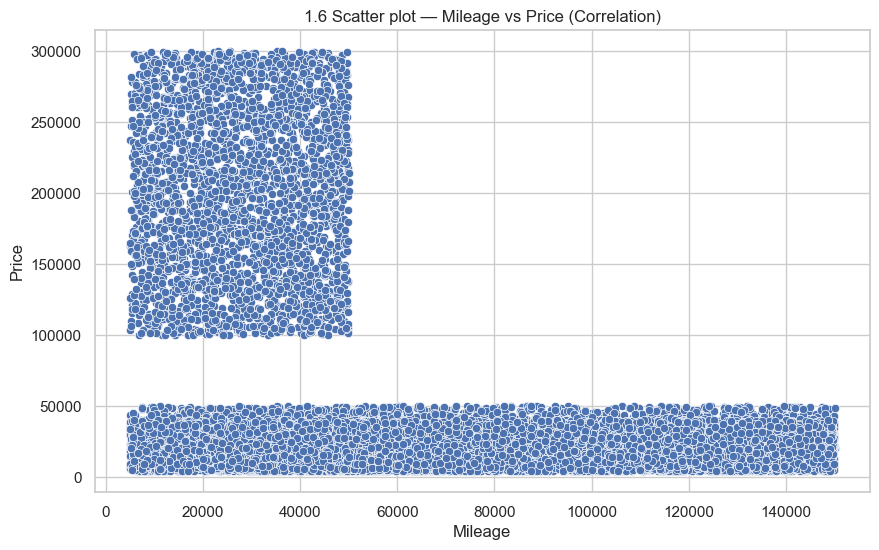

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title("1.6 Scatter plot — Mileage vs Price (Correlation)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


# 1.7 Pie chart — Ad expenditure split (Recession vs Non-recession)

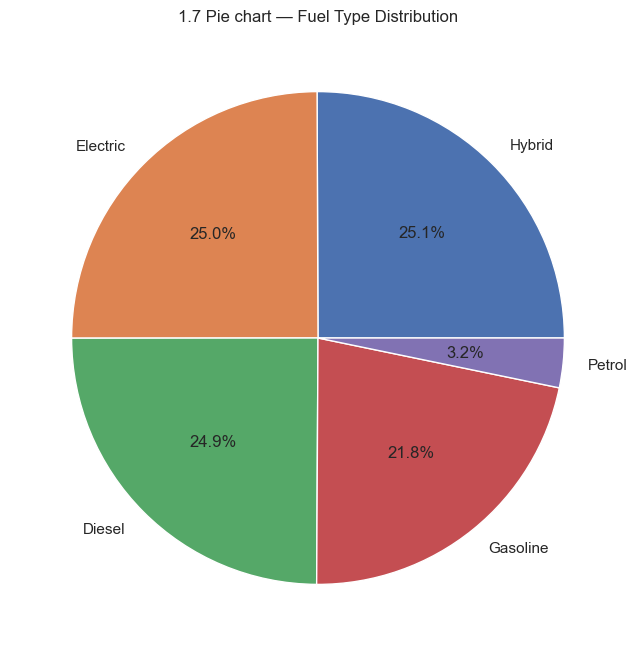

In [23]:
fuel_counts = df['Fuel Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title("1.7 Pie chart — Fuel Type Distribution")
plt.show()


In [ ]:
# 1.8 Pie chart — Ad spend by vehicle type (Recession)